In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from numpy.linalg import eig

In [6]:
iris=load_iris()
iris_data=iris.data
iris_target=iris.target
iris_feature_names=iris.feature_names
scaler=StandardScaler()
iris_data_scaled=scaler.fit_transform(iris_data)
example_data=iris_data[:5]
example_data_scaled=scaler.transform(example_data)
print(example_data_scaled)
n_samples=iris_data_scaled.shape[0]
print("Number of samples")
print(n_samples)

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
Number of samples
150


In [9]:
mean_vector=np.mean(iris_data_scaled,axis=0)
X_centered=iris_data_scaled-mean_vector
print("X centered is:")
print(X_centered)
print("np.dot(X_centered.T,X_centered)")
print(np.dot(X_centered.T,X_centered))


X centered is:
[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+

In [12]:
cov_matrix_manual=(1/(n_samples-1))*np.dot(X_centered.T,X_centered)
print("Manually computed covariance matrix")
print(cov_matrix_manual)

Manually computed covariance matrix
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [14]:
eigenvalues_manual,eigenvector_manual=eig(cov_matrix_manual)
print("Manually computed Eigen Values:")
print(eigenvalues_manual)
print("\nManually computed Eigen Vectors")
print(eigenvector_manual)

Manually computed Eigen Values:
[2.93808505 0.9201649  0.14774182 0.02085386]

Manually computed Eigen Vectors
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [16]:
sorted_indices=np.argsort(eigenvalues_manual[::-1])
top_2_indices=sorted_indices[:2]
top_2_eigenvector=eigenvector_manual[:,top_2_indices]
print("Top 2 Eigen vectors")
print(top_2_eigenvector)

Top 2 Eigen vectors
[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [20]:
iris_pca=np.dot(iris_data_scaled,top_2_eigenvector)
example_pca=np.dot(example_data_scaled,top_2_eigenvector)
print("Reduced 2D Example data")
print(example_pca)

Reduced 2D Example data
[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]]


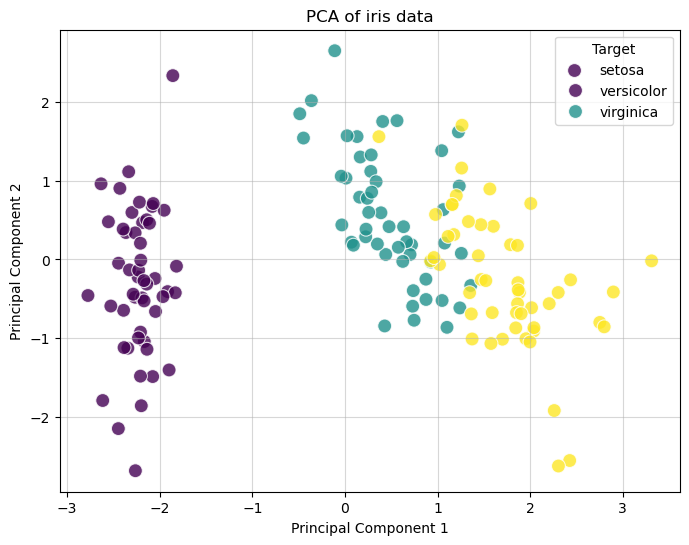

In [24]:
iris_pca_df=pd.DataFrame(data=iris_pca,columns=["Principal Component 1","Principal Component 2"])
iris_pca_df['Target']=iris_target
plt.figure(figsize=(8,6))
sns.scatterplot(x="Principal Component 1",y="Principal Component 2",hue="Target",data=iris_pca_df,palette="viridis",s=100,alpha=0.8)
plt.title("PCA of iris data")
plt.xlabel("Principal Component 1") 
plt.ylabel("Principal Component 2")
plt.legend(title="Target",labels=iris.target_names)
plt.grid(alpha=0.5)
plt.show()